## Ise and Nagoya Bay Water Quality & Car/Container Data

Authors: C. Herbert 

6/28/2021

In [1]:
# Import Packages
import json
import geopandas as gpd
import requests
import numpy as np
import matplotlib.pyplot as plt
import requests
import pandas as pd
import matplotlib.dates as mdates

import numpy as np
from scipy import stats
from scipy.stats import linregress

from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import matplotlib.pyplot as plt
import statsmodels
import sklearn

### Part I. Read in Data

***Ise Bay Water***
- Total Suspended Matter (TSM) 
    - Downloaded: TSM_2021-06-28_JP06-N3b.csv (20210628 at 11:29 AM EST)
- Chlorophyll (CHL-A) Downloaded
    - Downloaded: Chl-a_2021-06-28_JP04-N3b.csv

In [2]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot

In [3]:
# TSM, change path to where your data is downloaded
ib_tsm = pd.read_csv("C:/Users/claud/Downloads/Ise Bay, TSM_2021-06-28_JP06-N3b.csv", parse_dates=True).rename(columns={'measurement': 'TSM'})
ib_tsm = ib_tsm[["time", "TSM"]]
ib_tsm.head()

,time,TSM
0,2019-01-05T00:00:00.000Z,49.66
1,2019-01-12T00:00:00.000Z,-21.78
2,2019-01-19T00:00:00.000Z,-42.93
3,2019-01-26T00:00:00.000Z,73.00
4,2019-02-02T00:00:00.000Z,67.48


In [4]:
# CHL_A, change path to where your data is downloaded
ib_cha = pd.read_csv("C:/Users/claud/Downloads/Ise Bay, Chl-a_2021-06-28_JP04-N3b.csv", parse_dates=True).rename(columns={'measurement': 'CHL_A'})
ib_cha = ib_cha[["time", "CHL_A"]]
ib_cha.head()

,time,CHL_A
0,2019-01-05T00:00:00.000Z,90.19
1,2019-01-12T00:00:00.000Z,-44.89
2,2019-01-19T00:00:00.000Z,82.41
3,2019-01-26T00:00:00.000Z,290.35
4,2019-02-02T00:00:00.000Z,318.43


In [5]:
# Nagoya_2021-06-28_JP03-E9.csv
nagoya_car = pd.read_csv("C:/Users/claud/Downloads/Nagoya_2021-06-28_JP03-E9.csv", parse_dates=True).rename(columns={'measurement': 'CAR'})
nagoya_car.head()

,time,aoi,CAR,indicatorValue,referenceTime,dataProvider,eoSensor,colorCode,inputData
0,2019-11-27T00:00:00.000Z,"LatLng(35.08, 136.88)",0.86,/,Invalid DateTime,JAXA,ALOS-2,BLUE,industry
1,2020-01-03T00:00:00.000Z,"LatLng(35.08, 136.88)",0.66,/,Invalid DateTime,JAXA,Sentinel-1,BLUE,industry
2,2020-01-27T00:00:00.000Z,"LatLng(35.08, 136.88)",0.74,/,Invalid DateTime,JAXA,Sentinel-1,BLUE,industry
3,2020-01-31T00:00:00.000Z,"LatLng(35.08, 136.88)",0.72,/,Invalid DateTime,JAXA,ALOS-2,BLUE,industry
4,2020-02-08T00:00:00.000Z,"LatLng(35.08, 136.88)",0.96,/,Invalid DateTime,JAXA,Sentinel-1,BLUE,industry


In [6]:
datetimes = pd.to_datetime(ib_tsm ['time'])
ib_tsm['time_1'] = datetimes
print(ib_tsm.head())

datetimes = pd.to_datetime(ib_cha['time'])
ib_cha['time'] = datetimes
print(ib_cha.head())

                       time    TSM                    time_1
0  2019-01-05T00:00:00.000Z  49.66 2019-01-05 00:00:00+00:00
1  2019-01-12T00:00:00.000Z -21.78 2019-01-12 00:00:00+00:00
2  2019-01-19T00:00:00.000Z -42.93 2019-01-19 00:00:00+00:00
3  2019-01-26T00:00:00.000Z  73.00 2019-01-26 00:00:00+00:00
4  2019-02-02T00:00:00.000Z  67.48 2019-02-02 00:00:00+00:00
                       time   CHL_A
0 2019-01-05 00:00:00+00:00   90.19
1 2019-01-12 00:00:00+00:00  -44.89
2 2019-01-19 00:00:00+00:00   82.41
3 2019-01-26 00:00:00+00:00  290.35
4 2019-02-02 00:00:00+00:00  318.43


In [7]:
ib_tsm = ib_tsm.assign(ann_TSM = (ib_tsm.TSM / 100))
ib_cha = ib_cha.assign(ann_CHL_A= (ib_cha.CHL_A/ 100))
nagoya_car = nagoya_car.assign(car_ann = (nagoya_car.CAR / nagoya_car.CAR.mean())*100)

nagoya_car.head()

,time,aoi,CAR,indicatorValue,referenceTime,dataProvider,eoSensor,colorCode,inputData,car_ann
0,2019-11-27T00:00:00.000Z,"LatLng(35.08, 136.88)",0.86,/,Invalid DateTime,JAXA,ALOS-2,BLUE,industry,102.152932
1,2020-01-03T00:00:00.000Z,"LatLng(35.08, 136.88)",0.66,/,Invalid DateTime,JAXA,Sentinel-1,BLUE,industry,78.396437
2,2020-01-27T00:00:00.000Z,"LatLng(35.08, 136.88)",0.74,/,Invalid DateTime,JAXA,Sentinel-1,BLUE,industry,87.899035
3,2020-01-31T00:00:00.000Z,"LatLng(35.08, 136.88)",0.72,/,Invalid DateTime,JAXA,ALOS-2,BLUE,industry,85.523385
4,2020-02-08T00:00:00.000Z,"LatLng(35.08, 136.88)",0.96,/,Invalid DateTime,JAXA,Sentinel-1,BLUE,industry,114.031180


Combining data: 

In [8]:
ib_water = pd.concat([ib_tsm, ib_cha], axis=1)[["time_1","TSM","CHL_A","ann_CHL_A","ann_TSM"]].rename(columns={'time_1': 'time'})
ib_water.head()

,time,TSM,CHL_A,ann_CHL_A,ann_TSM
0,2019-01-05 00:00:00+00:00,49.66,90.19,0.9019,0.4966
1,2019-01-12 00:00:00+00:00,-21.78,-44.89,-0.4489,-0.2178
2,2019-01-19 00:00:00+00:00,-42.93,82.41,0.8241,-0.4293
3,2019-01-26 00:00:00+00:00,73.00,290.35,2.9035,0.7300
4,2019-02-02 00:00:00+00:00,67.48,318.43,3.1843,0.6748


Pretty sure we don't want to use demeanded data, but wanted to see how different it would look

In [9]:
datetimes = pd.to_datetime(nagoya_car['time'])
nagoya_car['time'] = datetimes
print(nagoya_car.head())

                       time                    aoi   CAR indicatorValue  \
0 2019-11-27 00:00:00+00:00  LatLng(35.08, 136.88)  0.86              /   
1 2020-01-03 00:00:00+00:00  LatLng(35.08, 136.88)  0.66              /   
2 2020-01-27 00:00:00+00:00  LatLng(35.08, 136.88)  0.74              /   
3 2020-01-31 00:00:00+00:00  LatLng(35.08, 136.88)  0.72              /   
4 2020-02-08 00:00:00+00:00  LatLng(35.08, 136.88)  0.96              /   

      referenceTime dataProvider    eoSensor colorCode inputData     car_ann  
0  Invalid DateTime         JAXA      ALOS-2      BLUE  industry  102.152932  
1  Invalid DateTime         JAXA  Sentinel-1      BLUE  industry   78.396437  
2  Invalid DateTime         JAXA  Sentinel-1      BLUE  industry   87.899035  
3  Invalid DateTime         JAXA      ALOS-2      BLUE  industry   85.523385  
4  Invalid DateTime         JAXA  Sentinel-1      BLUE  industry  114.031180  


Plotting our data: 

Because our car and container data is limited temporally and an indexed, let's look at it on it's own axis

C:\Users\claud\Anaconda3_windows\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


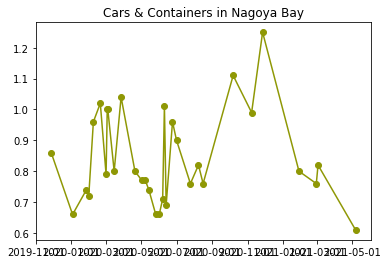

In [10]:
plt.plot(nagoya_car.time, nagoya_car.CAR, marker='o', color='#8f9805') 
formatter = mdates.DateFormatter("%Y-%m-%d")
ax = plt.gca()
ax.xaxis.set_major_formatter(formatter)
plt.title('Cars & Containers in Nagoya Bay')
plt.show()

## Part 2: let's now look at the dates between the shutdown periods

Enter the dates for the lockdown using the function below

In [11]:
def get_input():
    print("\nEnter start lockdown date (example->'2020-03-25 00:00:00+00:00') >> ")
    start_lock = input()
    print("\nEnter end lockdown date (example-> '2021-06-28 00:00:00+00:00') >> ")
    end_lock = input()
    return([start_lock,end_lock])   #returns the list of user inputs

If you don't know what dates to use, the example is the approximate shutdown to present for Japan

In [12]:
user_input = get_input()


Enter start lockdown date (example->'2020-03-25 00:00:00+00:00') >> 
2020-03-25 00:00:00+00:00

Enter end lockdown date (example-> '2021-06-28 00:00:00+00:00') >> 
2021-06-28 00:00:00+00:00


In [13]:
def get_wq_data_lockdown(user_input):
   #this is takes a user-input lockdown dates and returns filtered water quality data
    mask = (ib_water['time'] > user_input[0]) & (ib_water['time'] <= user_input[1])
    shut = ib_water.loc[mask]
    return shut

In [14]:
def get_car_data_lockdown(user_input):
   #this is takes a user-input lockdown dates and returns filtered water quality data
    mask = (nagoya_car['time'] > user_input[0]) & (nagoya_car['time'] <= user_input[1])
    shut = nagoya_car.loc[mask]
    return shut

In [15]:
shutdown_water = get_wq_data_lockdown(user_input)
shutdown_car = get_car_data_lockdown(user_input)

In [16]:
print('Average cars in Port of Nagoya (%):' + str(shutdown_car.mean()[1]))
print('Average Total Suspended Matter anomaly (%):' + str(shutdown_water.mean()[0]))
print('Average Chlorophyll-a anomaly (%):' + str(shutdown_water.mean()[1]))

Average cars in Port of Nagoya (%):99.2913545252075
Average Total Suspended Matter anomaly (%):50.441296296296294
Average Chlorophyll-a anomaly (%):52.90277777777777


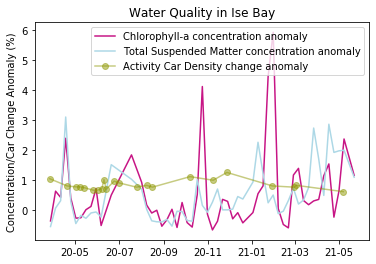

In [17]:
plt.plot(shutdown_water.time, shutdown_water.ann_CHL_A,  color='mediumvioletred', label = 'Chlorophyll-a concentration anomaly') 
plt.plot(shutdown_water.time, shutdown_water.ann_TSM, color='lightblue', label='Total Suspended Matter concentration anomaly') 
plt.plot(shutdown_car.time, shutdown_car.CAR,  marker='o', color='#8f9805', alpha = .5, label = "Activity Car Density change anomaly") 
formatter = mdates.DateFormatter("%y-%m")
ax = plt.gca()
plt.legend()
ax.xaxis.set_major_formatter(formatter)
plt.ylabel('Concentration/Car Change Anomaly (%)')
plt.title('Water Quality in Ise Bay')
plt.show()

In [18]:
# reading in our raster data from the created tif
wq  = pd.read_csv("C:/Users/claud/Downloads/raster_avgs.csv", parse_dates=True).rename(columns={'mean_tiff_val': 'WQ'})
wq = wq.assign(ann_wq = (wq.WQ/ wq.WQ.mean()))

# convert the date column to be a time variable 
datetimes = pd.to_datetime(wq['date'])
wq['time'] = datetimes

wq = wq[["time", "WQ", "ann_wq"]]
wq.head()

,time,WQ,ann_wq
0,2019-11-01,151.636064,1.010820
1,2019-11-02,146.850284,0.978918
2,2019-11-03,141.683547,0.944476
3,2019-11-04,150.753343,1.004936
4,2019-11-05,150.041109,1.000188


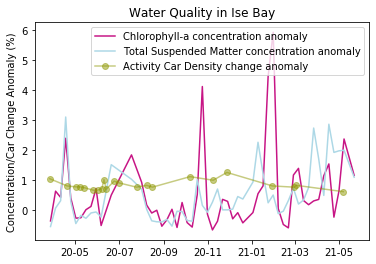

In [19]:
plt.plot(shutdown_water.time, shutdown_water.ann_CHL_A,  color='mediumvioletred', label = 'Chlorophyll-a concentration anomaly') 
plt.plot(shutdown_water.time, shutdown_water.ann_TSM, color='lightblue', label='Total Suspended Matter concentration anomaly') 
plt.plot(shutdown_car.time, shutdown_car.CAR,  marker='o', color='#8f9805', alpha = .5, label = "Activity Car Density change anomaly") 
formatter = mdates.DateFormatter("%y-%m")
ax = plt.gca()
plt.legend()
ax.xaxis.set_major_formatter(formatter)
plt.ylabel('Concentration/Car Change Anomaly (%)')
plt.title('Water Quality in Ise Bay')
plt.show()

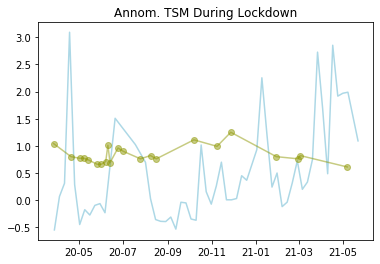

In [20]:
plt.plot(shutdown_water.time, shutdown_water.ann_TSM, color='lightblue')
plt.plot(shutdown_car.time, shutdown_car.CAR, marker='o', color='#8f9805', alpha = .5) 
# plt.plot(wq.time, wq.ann_wq,  marker='o', color='red', alpha = .5)
formatter = mdates.DateFormatter("%y-%m")
ax = plt.gca()
ax.xaxis.set_major_formatter(formatter)
plt.title('Annom. TSM During Lockdown')
plt.show()